# Week 9 homework

## Question 1 
### Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term)

The linear regression model is a way to present the relationship between two variables, it expresses very similar as a linear function, although, our estimate model does come out as a line lying on the axis of variables. The general model equation is the following:

### $$ Y_i = β_0 + β_1 x_i + ε_i $$
also given that the linear function equation is 
### $$ y = mx+b $$

In our model equation, the Y stands for the predicted outcome, it is dependent on our input $x_i$ and represent every dot exists on our estimated line. The $β_0$ is the intercept of the function, which basically does the same job as the variable "b" in our linear function $y = mx + b$. The variable $x_i$ is just simply our input value thats independent, also is our predictor variable. The $β_0$ denmonstrates the estimated slope of the line, same function as $m$ in the linear function equation. Lastly, $ε_i$ demonstrates the error of observed value and estimated value, and is assumed to be normally distributed. To have an overall error of 0 -get as accurate as possible, the mean of the error should be 0. 


In [5]:
import numpy as np
import plotly.graph_objects as go

n = 100                  
beta0 = 2.0           
beta1 = 1.5            
sigma = 1.0             

x = np.random.uniform(0, 10, n)

errors = np.random.normal(0, sigma, n)

Y = beta0 + beta1 * x + errors

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data'))

x_line = np.linspace(min(x), max(x), 100)
y_line = beta0 + beta1 * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='Theoretical Line'))

fig.update_layout(
    title='Simple Linear Model: Y vs. x',
    xaxis_title='Predictor (x)',
    yaxis_title='Outcome (Y)',
)

fig.show(renderer="png")

The figure above is a model generated by the chatbot, setting 100 random data points between the value of x being {0,10}, which was done through the np.random. This model is a reverse approach then what we would normally in the real world, it sets to a certain theoratical line, and perform the random data points around the line by setting the variables 
n = 100
beta0 = 2.0
beta1 = 1.5
sigma = 1.0

## Question 2
### Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf
Done with question 3 work

## Question 3
### Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf

np.random.seed(0) 
n = 100           
beta0 = 2.0     
beta1 = 1.5 
sigma = 1.0     
x = np.random.uniform(0, 10, n)
errors = np.random.normal(0, sigma, n)

y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': y})

model = smf.ols(formula='y ~ x', data=df).fit()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['x'], y=df['y'], mode='markers', name='Data Points'))

x_line = np.linspace(min(x), max(x), 100)
y_theoretical = beta0 + beta1 * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_theoretical, mode='lines', name='Theoretical Line'))

y_fitted = model.params['Intercept'] + model.params['x'] * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_fitted, mode='lines', name='Fitted Line'))

fig.update_layout(
    title='Simple Linear Regression: Theoretical vs. Fitted Model',
    xaxis_title='Predictor (x)',
    yaxis_title='Outcome (y)',
)

fig.show(renderer="png")
print(model.summary())


The red line, which is the theoratical line, was made prior the data sets, and the random data points were made based of this line with naturally distributed errors, we've set its variables. While the green line in the figure, which refers to our line of best fit. Since we have our 100 random data points, by calculating the residuals, which is the difference between each predicted $Y$ value and the actual observed $Y_i$ value, in this case our data set values. As we sum the square of the residuals we could solve the $β_0$ and $β_1$ that best fits the data set, using this, we could get our line of best fit since we have the best fitted slope and intercept. The following is our fitted line equation $\hat{y_i} = \hat{β_0} + \hat{β_1}x_i$. 


## Question 4
### Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

Using the statsmodels, we can found the best fitted slope and intercept variables and store them in fitted_model.params, then since we have the $β_1$, $β_0$ and $x$, we can calculate each predicted y-values interms of x using the equation and store them in fitted_model.fittedvalues. Meaning that fitted_model.fittedvalues is a list of all the predicted Y values that was calculated earlier using the equation. Lastly using fitted_model.summary().tables[1], we are able to view those information about the line.



## Question 5
### Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"
Ordinary Least Squares (OLS) is a method used to find the line that best fits a dataset by minimizing the total error. The process involves minimizing the sum of the squared errors, which is the sum of the squared residuals (differences between observed and predicted values). Squaring the residuals ensures that errors are positive, preventing them from canceling each other out. Additionally, squaring gives more weight to larger errors, so that outliers have a greater influence on the fit. This approach yields a line with minimized residuals, making it the best fit for the data under a linear model.


## Question 6
### Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.
The proportion of variation in Y basically explain how well our line helps explain the patterns in our outcomes. The equation is 1 subtract by the sum of our residuals squared over the sum of total variances. Which is the calculation of our $R^2$. It is a variable determine how accurate our line is, within a scale of 0 to 1, as it is closer to 0, it is less fit to the data; if its closer to 1, it well fits the data sets, the fitted_model.rsquared is basically the code version calculating the variable. However, this $R^2$ variable is also known as the square of correlation coefficient between X and Y in simple linear regression. The fitted_model.rsquared method directly computes from the OLS and np.corrcoef(...)[0,1]**2 squares the correlation coefficient of X and Y and this approach does not involve the regression fitting process itself. 

## Question 7
### Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

By looking at the distibution histogram, the residuals skews to the right, where there are the most amount of residuals with the range of -40 to -20.1. From the linear line graph, we can also see this correlation since majority of the data points are below the line. One of the assumption i can say is that with the crop having the fertilizer amount being at 3 to 8 kg consistantly below our line of best fit, which does suggest a systmatic bias occuring.


In [2]:
# The example given:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

## Question 8
### Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset

The R-squared value is 0.811, meaning that about 81.1% of the variance in duration is explained by the waiting variable, which denmonstrates a strong linear relationship between waiting and duration. The p-value for the slope coefficient < 0.0001, indicating strong evidence of rejecting the null hypothesis.  

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:02:49   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 9
### As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

Over the course of short waitime increase(62,64,66), the intercept coefficient show an increase which denmonstrates that the baseline variable when waiting time is at zero decreases, the predicted duration is lower when wait time is 0. Meanwhile the waiting time coefficient increase denmonstrates the slope of the line increases and shows the increased Effect of waiting time on duration. However, at threshod of 62 mark since the p-value is at 0.238, meaning we have no evidence to reject the null hypothesis, thus we failed to reject. But as the waiting time threshold increases,, the p-value follows along to decrease in the case that at 64 mark, the p-value refers to moderate and we rejects the null hypothesis at the 66 mark. 

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


## Question 10
### Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:
1. create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

2. simulate samples (of size n=160) from a Simple Linear Regression model that uses beta0 = 1.65, beta1 = 0 std dev = 0.37 along with the values of waiting for to create simuations of and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"; then,

3. report if is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?

95% Bootstrapped Confidence Interval for Slope Coefficient: (-0.00015187197257140317, 0.023850483888833814)
True slope coefficient (from the fitted model): 0.012244029446523483
Is the true slope inside the 95% bootstrapped CI? True
P-value from fitted model: 0.038135755338567744


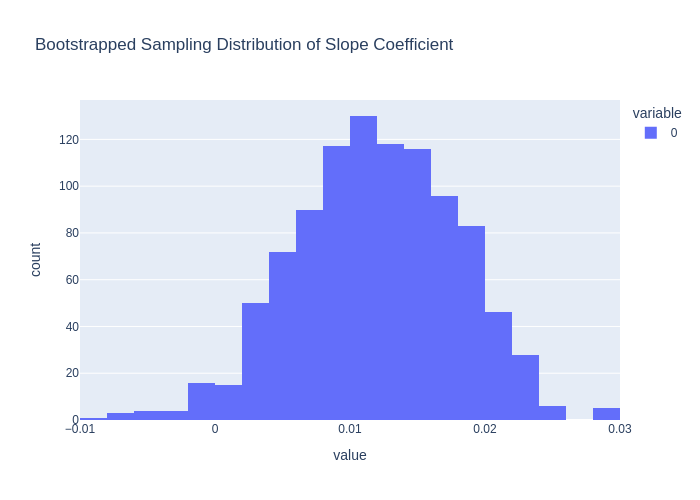

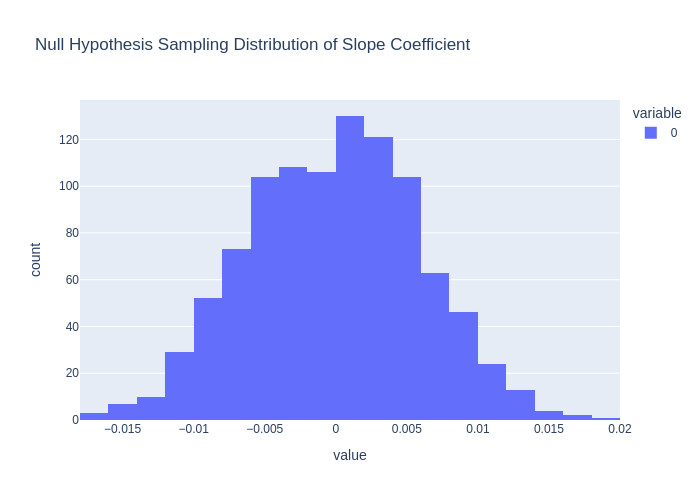

95% Bootstrapped Confidence Interval for Slope Coefficient: (-0.00010989639967406863, 0.022578353108170704)
True slope coefficient (from the fitted model): 0.012244029446523483
Is the true slope inside the 95% bootstrapped CI? True
P-value from fitted model: 0.038135755338567744


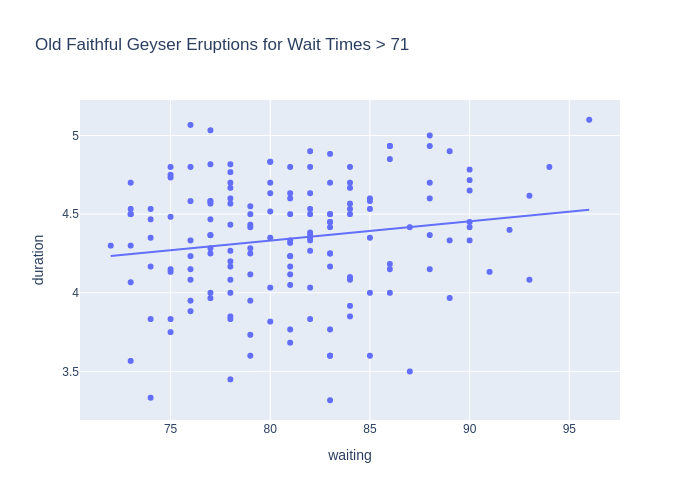

In [17]:
# Code for question 10
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Load the Old Faithful dataset (make sure 'old_faithful' is loaded with columns 'duration' and 'waiting')
# Replace 'old_faithful' with the appropriate DataFrame if loading from file

# Set long wait limit
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit

# Part 1: Bootstrap Slope Coefficients
bootstrapped_slopes = []
n_bootstraps = 1000

for _ in range(n_bootstraps):
    sample_data = old_faithful[long_wait].sample(n=160, replace=True)
    model = smf.ols('duration ~ waiting', data=sample_data).fit()
    bootstrapped_slopes.append(model.params.iloc[1])  # Fixed to use iloc

# Visualize the bootstrapped sampling distribution
fig = px.histogram(bootstrapped_slopes, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficient")
fig.show(renderer="png")

# Part 2: Simulate Null Hypothesis Sampling Distribution
null_slope_coeffs = []
beta0, beta1, std_dev = 1.65, 0, 0.37
waiting_values = old_faithful[long_wait]['waiting'].values

for _ in range(n_bootstraps):
    simulated_duration = beta0 + beta1 * waiting_values + np.random.normal(0, std_dev, size=len(waiting_values))
    simulated_data = pd.DataFrame({'duration': simulated_duration, 'waiting': waiting_values})
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    null_slope_coeffs.append(model.params.iloc[1])  # Fixed to use iloc

# Visualize the null hypothesis sampling distribution
fig = px.histogram(null_slope_coeffs, nbins=30, title="Null Hypothesis Sampling Distribution of Slope Coefficient")
fig.show(renderer="png")

# Part 3: Bootstrapped Confidence Interval and p-value Comparison
model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()

# Bootstrapped Confidence Interval
lower_bound = np.percentile(bootstrapped_slopes, 2.5)
upper_bound = np.percentile(bootstrapped_slopes, 97.5)

# Print the confidence interval
print(f"95% Bootstrapped Confidence Interval for Slope Coefficient: ({lower_bound}, {upper_bound})")

# Check if the true slope coefficient (beta1) is inside the confidence interval
true_slope = model.params.iloc[1]  # Updated to iloc for positional indexing
print(f"True slope coefficient (from the fitted model): {true_slope}")
print(f"Is the true slope inside the 95% bootstrapped CI? {lower_bound < true_slope < upper_bound}")

# Compare the p-value from the fitted model with the p-value from simulation
p_value = model.pvalues.iloc[1]  # Updated to iloc for positional indexing
print(f"P-value from fitted model: {p_value}")

# Plot the original data with regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration',
                 title=f"Old Faithful Geyser Eruptions for Wait Times > {long_wait_limit}",
                 trendline='ols')
fig.show(renderer="png")


## Question 11
### . Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length

where we use (rather than) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications
smf.ols('duration ~ waiting', data=old_faithful)

smf.ols('duration ~ waiting', data=old_faithful[short_wait])

smf.ols('duration ~ waiting', data=old_faithful[long_wait])

and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


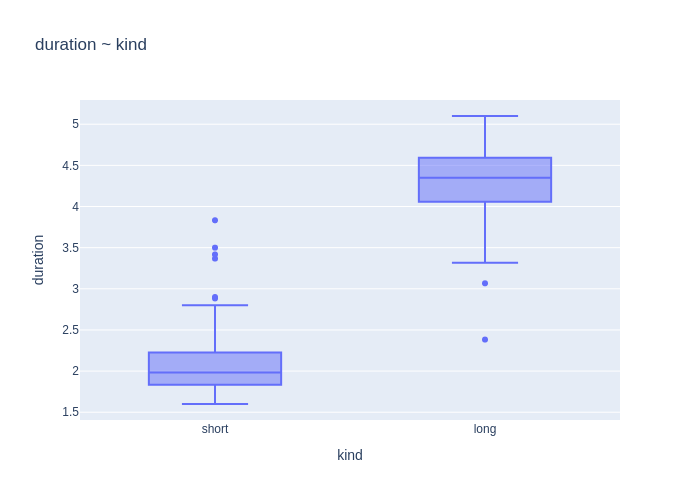

In [18]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

In this new model, we use kind as an indicator variable, with "short" as the reference category. This means we can compare the average eruption duration between "short" and "long" wait times in a single model. Looking at the previous models(Q9 and Q10): We split the data by "short" or "long" wait times and fit separate regression lines. This let us see the relationship within each group but didn't make it easy to compare the two groups directly. Meanwhile for the current model, by adding an indicator variable, we can test for a difference between the groups in one model. Instead of separate lines, it gives us the average difference in duration between "short" and "long" groups. This way better denmonstrates whether there's a significant difference between the two categories, helping us see if the average eruption duration is meaningfully different based on wait time category.

Chatbot section1:
Here’s a shorter summary of our work:

Group Analysis and Bootstrapping:

We split the Old Faithful data into "short" (<68 minutes) and "long" (≥68 minutes) wait times and used bootstrapping to estimate the distribution of slope coefficients for the "long" wait time group.
Simulated Sampling Distribution:

We simulated a null hypothesis of "no linear association" using specific parameters, then compared the p-value and confidence intervals with the observed data.
Indicator Variable Model:

We introduced an indicator variable for "short" and "long" wait times to directly compare the two groups in one model, avoiding the need for separate regression lines.
Model Comparison:

The indicator variable model simplifies the comparison between groups and provides a direct test for differences in mean eruption durations, improving upon earlier models that used separate lines for each group.
link: https://chatgpt.com/share/672d8eef-1d30-800a-9cfd-01f64b516249

chatbot section 2:

Here's a shorter summary of what we did:

Full Data Regression: We fitted a Simple Linear Regression model on the full dataset (duration vs. waiting time), showing a strong linear relationship with a significant p-value.

Long Wait Time Analysis: We restricted the data to long wait times (waiting > 71 minutes) and performed a similar regression.

Bootstrapping: We generated bootstrap samples of the long wait data, visualized the distribution of slope coefficients, and calculated a 95% confidence interval.

Null Hypothesis Simulation: We simulated data under the null hypothesis (no linear association) to estimate a p-value and compared it with the original model’s p-value.

Comparison & Interpretation: We compared the observed slope with the bootstrapped confidence interval and simulated p-value to assess the relationship between waiting time and eruption duration.

In conclusion, the analysis showed a significant relationship between wait time and eruption duration for long wait times.
link:https://chatgpt.com/share/672d8f1a-d014-800a-b058-f99c050a8678
We simulated a Simple Linear Regression model by generating predictor values 𝑋 X from a uniform distribution and outcome values 𝑌 Y using a linear equation with added random error. We visualized the data points, the theoretical regression line (based on the true intercept and slope), and the fitted model line obtained through Ordinary Least Squares (OLS) regression. Residuals, the differences between observed and predicted values, were shown as red dashed lines. The R-squared value, which represents the proportion of variance in 𝑌 Y explained by 𝑋 X, was calculated using both the OLS model (fitted_model.rsquared) and the correlation coefficient (np.corrcoef(...)[0,1]**2).
link https://chatgpt.com/share/672d903b-b274-800a-9273-954b03770954